In [1]:
import sys
import pathlib

ROOT = pathlib.Path(".").absolute().parent.parent
sys.path.append(str(ROOT))

In [2]:
import os
from models.CNNs import CNNs
from datasets.SPCUP22MelDataModule import SPCUP22MelDataModule

/home/iubnlp/anaconda3/envs/spcup/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

In [4]:
from utils.metrics import (
    plot_classification_report,
    pytorch_lightning_make_predictions as make_predictions,
    print_scores
)

In [5]:
hparams = {
    "network": "ResNet34",
}

checkpoint = CNNs.load_from_checkpoint(
    str(ROOT.joinpath("checkpoints", "resnet34_on_train_dataset_augmented", "last.ckpt")),
    **hparams,
)

data_module = SPCUP22MelDataModule(
    64,
    dataset_root=pathlib.Path(ROOT.joinpath("data", "mel_feature", "spcup22")).absolute(),
    config_file_path=str(ROOT.joinpath("config","mel_feature.yaml")),
    should_include_augmented_data=True,
    num_workers=8,
)

In [6]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module,
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_training.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_train_augmented.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part1_mel_features.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part2_mel_features.zip]...
Predicting: 100%|██████████| 75/75 [00:14<00:00,  5.22it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:103: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [7]:
print_scores(actual_labels, predictions)


    F1 Score: 0.97
    Accuracy: 0.97
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

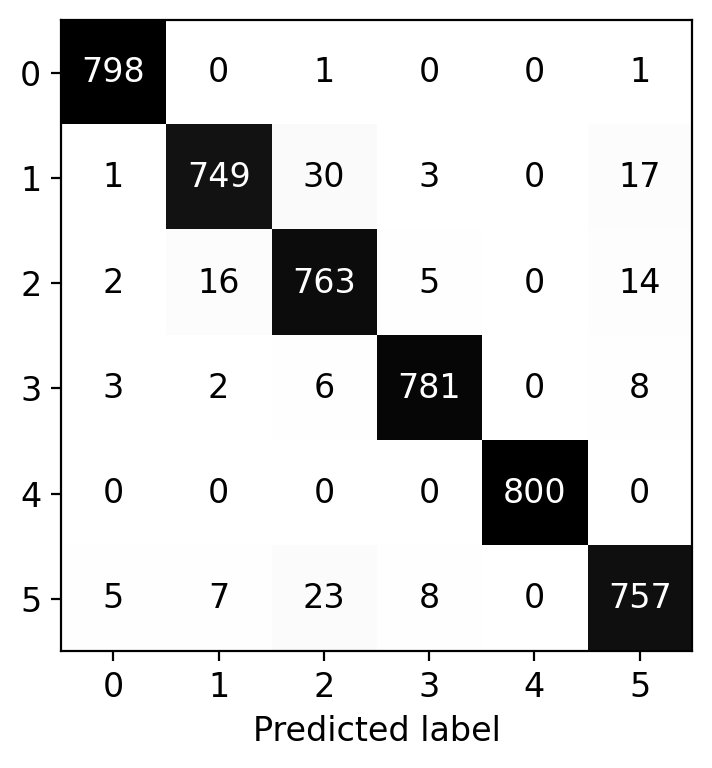

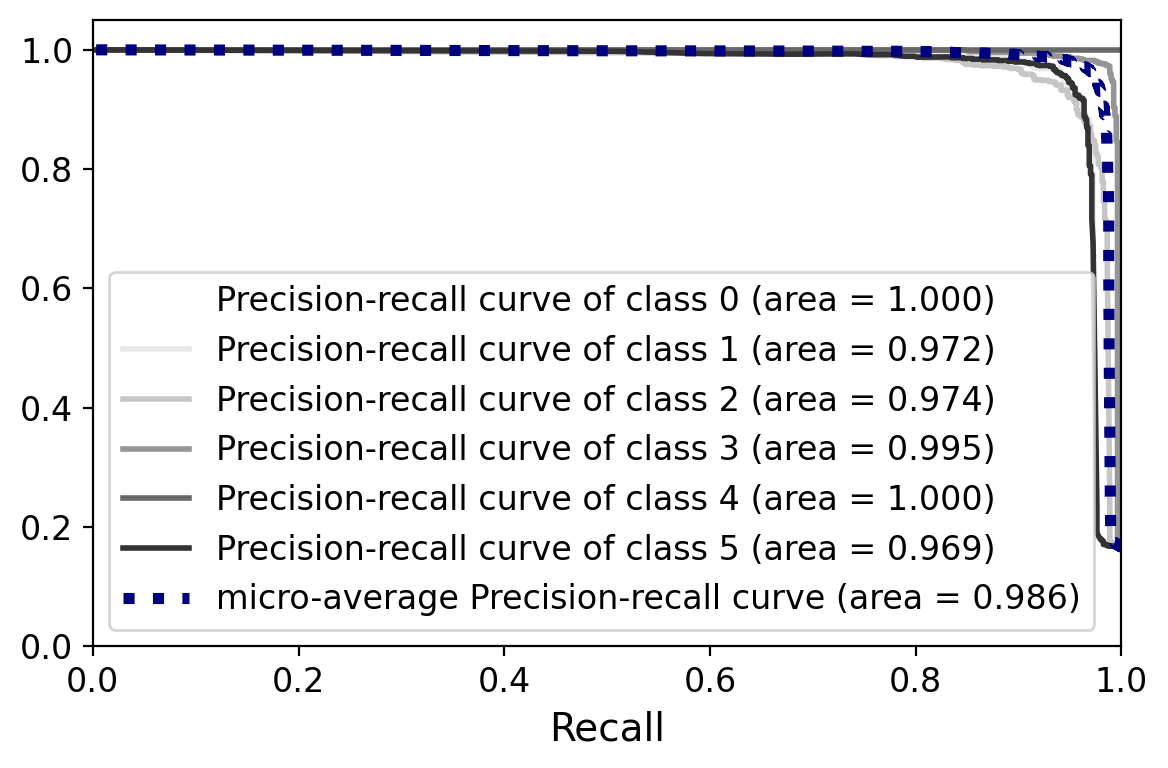

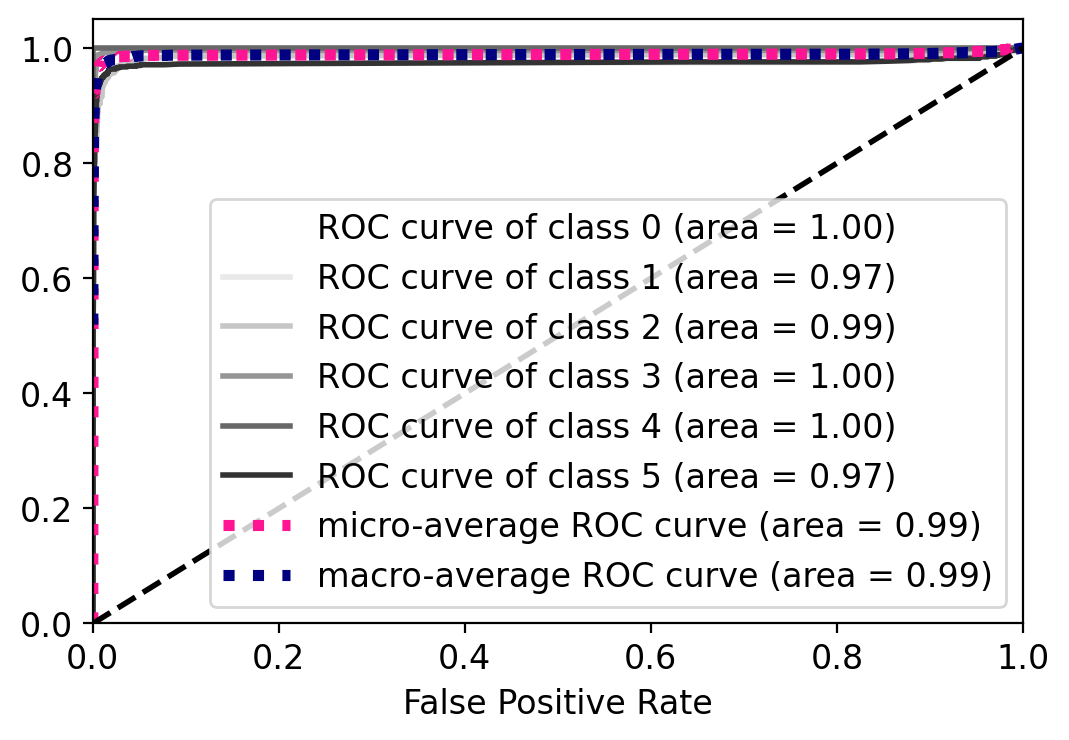

In [8]:
fig_save_path = str(ROOT.joinpath("results", "resnet34", "with_augmented"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="ResNet34 (With augmented samples)",
    save_path=fig_save_path
)

In [ ]:
hparams = {
    "network": "ResNet34",
}

checkpoint = CNNs.load_from_checkpoint(
    str(ROOT.joinpath("resnet34_on_train_dataset_augmented","last.ckpt")),
    **hparams,
)
data_module = SPCUP22MelDataModule(
        64,
        dataset_root=pathlib.Path(ROOT.joinpath("data","spcup22")).absolute(),
        config_file_path=str(ROOT.joinpath("config","mel_feature.yaml")),
        should_include_augmented_data=True,
        num_workers=8,
    )

In [ ]:
actual_labels, predictions, probabilities, _ = make_predictions(
    checkpoint, data_module
);

In [ ]:
print_scores(actual_labels, predictions)

In [ ]:
fig_save_path = str(ROOT.joinpath("results", "resnet34", "with_augmented"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="ResNet34 (With augmented samples)",
    save_path=fig_save_path
)